In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X,y = datasets.make_moons()

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

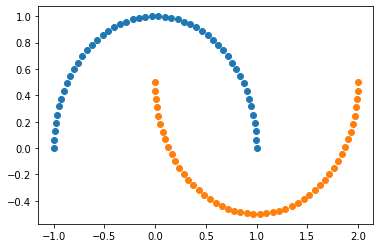

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

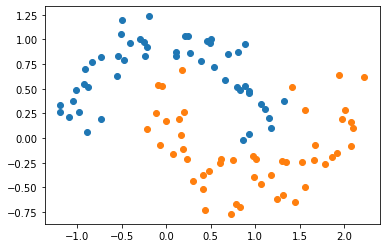

In [7]:
X,y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### polynomial features SVM

In [8]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
  return Pipeline([
                   ("Poly", PolynomialFeatures(degree = degree)),
                   ("std_scaler", StandardScaler()),
                   ("LinearSVC", LinearSVC(C=C))
  ])


In [9]:
Poly_svc=PolynomialSVC(degree=3)

In [11]:
Poly_svc.fit(X,y)

Pipeline(steps=[('Poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('LinearSVC', LinearSVC())])

In [12]:
def plot_decision_boundary(model, axis):

  x0, x1 = np.meshgrid(
      np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
      np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1),
  )
  X_new = np.c_[x0.ravel(),x1.ravel()]

  y_predict = model.predict(X_new)
  zz = y_predict.reshape(x0.shape)

  from matplotlib.colors import ListedColormap
  custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


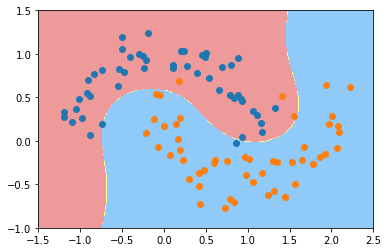

In [13]:
plot_decision_boundary(Poly_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### Polynomial Kernel SVM

In [14]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
  return Pipeline([
                   ("std_scler", StandardScaler()),
                   ("kernerSVC", SVC(kernel = "poly",degree=degree,C=C))
  ])

In [16]:
poly_kernel_svc=PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X,y)

Pipeline(steps=[('std_scler', StandardScaler()),
                ('kernerSVC', SVC(kernel='poly'))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


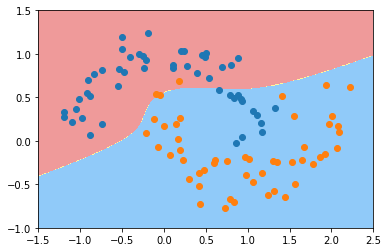

In [18]:
plot_decision_boundary(poly_kernel_svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()